# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import pandas as pd
import matplotlib.pyplot as plt

# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=False, enhanced=True)

Loading dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


In [5]:
df = data_loader.enhanced_incidents_df

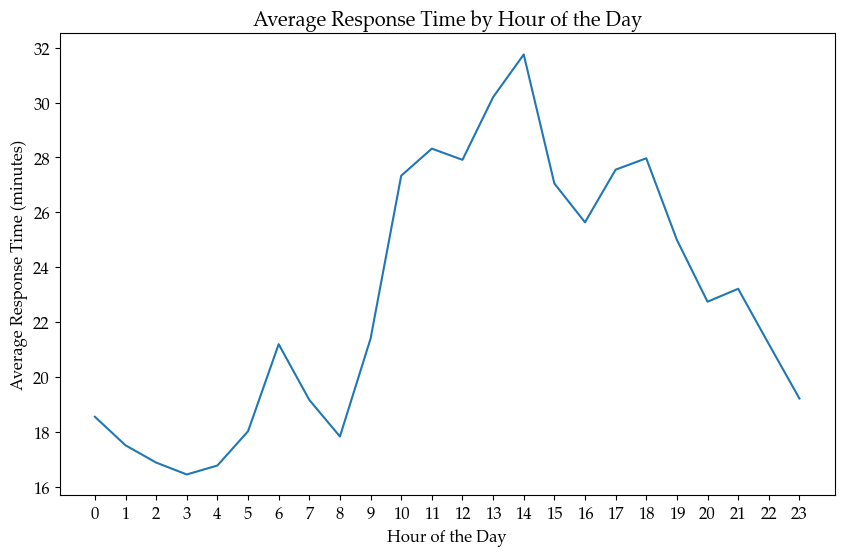

AttributeError: 'DataFrame' object has no attribute 'iteritems'

<Figure size 1000x600 with 0 Axes>

In [10]:
# Calculate response time in minutes
df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']) / pd.Timedelta(minutes=1)

# Plot 1: Average response time by hour of the day
avg_response_time_by_hour = df.groupby(df['time_call_received'].dt.hour)['response_time'].mean()

# Plot 1: Average response time by hour of the day
avg_response_time_by_hour = df.groupby(df['time_call_received'].dt.hour)['response_time'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_response_time_by_hour.index, avg_response_time_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day')
plt.xticks(range(24))
plt.show()

# Plot 2: Average response time by hour of the day and triage impression
response_time_by_hour_triage = df.groupby([df['time_call_received'].dt.hour, 'triage_impression_during_call'])['response_time'].mean().unstack()
plt.figure(figsize=(10, 6))
for triage, data in response_time_by_hour_triage.iteritems():
    plt.plot(data.index, data.values, label=triage)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day and Triage Impression')
plt.xticks(range(24))
plt.legend()
plt.show()

In [7]:
# Plot 1: Average response time by hour of the day, using existing 'response_time'
df['response_time'] = (df['time_ambulance_arrived_at_scene'] - df['time_call_received']) / pd.Timedelta(minutes=1)
avg_response_time_by_hour = df.groupby(df['time_call_received'].dt.hour)['response_time'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_response_time_by_hour.index, avg_response_time_by_hour.values, marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day')
plt.xticks(range(24))
plt.ylim(0)  # Adjust y-axis to start from 0
plt.grid(True)
plt.show()

# Plot 2: Average response time by hour of the day and triage impression, using existing 'response_time'
response_time_by_hour_triage = df.groupby([df['time_call_received'].dt.hour, 'triage_impression_during_call'])['response_time'].mean().unstack()
plt.figure(figsize=(10, 6))
for triage, data in response_time_by_hour_triage.items():
    plt.plot(data.index, data.values, marker='o', linestyle='-', label=triage)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Response Time (minutes)')
plt.title('Average Response Time by Hour of the Day and Triage Impression')
plt.xticks(range(24))
plt.legend()
plt.ylim(0)  # Adjust y-axis to start from 0
plt.grid(True)
plt.show()


KeyError: 'Column not found: response_time'